# Capstone Final 24.1 — Exploratory Data Analysis (EDA)
# ----------------------------------------------------------
- Title: Buy vs Rent Decision Modeling - Initial EDA
- Author: Siddarth R Mannem
- Course: AI/ML Professional Certificate - Capstone 24.1
# ----------------------------------------------------------

### Buy vs. Rent in 2025–2026: A ZIP-Level Cash-Flow Comparison

This notebook performs detailed EDA on ZIP-level housing data to understand affordability trends across the U.S. It builds on state-level analysis from Capstone 20.1 and enhances granularity to ZIP code resolution.

We explore:
- Distribution of key housing economics (home price, rent, tax rate, insurance)
- Correlation between mortgage rate and ownership cost
- Regional disparities across ZIPs and states
- Visual analysis using scatter plots, choropleths, and affordability metrics

The outputs of this notebook will inform cost modeling (Notebook 02) and scenario simulations (Notebook 03).




In [2]:
# ----------------------------------------------------------
# SECTION 1: Setup & Data Overview
# ----------------------------------------------------------
# Load required libraries, configure paths, and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive

pd.set_option('display.float_format', lambda x: '%.2f' % x)


drive.mount('/content/drive')
capstone_data_base_path = '/content/drive/MyDrive/Colab Notebooks/Capstone-Project-Final-24.1/data2/'
capstone_figures_base_path = '/content/drive/MyDrive/Colab Notebooks/Capstone-Project-Final-24.1/figures/'
capstone_figures_eda = '/content/drive/MyDrive/Colab Notebooks/Capstone-Project-Final-24.1/figures/eda/'


df = pd.read_csv(capstone_data_base_path + "master_housing_dataset_zip.csv")

print("Shape:", df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape: (395376, 20)


,zip,date,state,City,Metro,county_name,median_price,median_rent,mortgage_rate,tax_rate_3yr_avg,insurance_pct,maintenance_pct,total_annual_ownership_cost_pct,property_tax_share,rent_to_price_ratio,price_to_rent_years,median_price_growth,median_rent_growth,year,MORTGAGE30US
0,1002,2023-08-01,MA,Amherst,"Springfield, MA",Hampshire County,481709,2587,0.07,NaN,NaN,NaN,0.00,0.00,0.06,15.52,NaN,NaN,2023,6.81
1,1002,2023-09-01,MA,Amherst,"Springfield, MA",Hampshire County,485690,2588,0.07,NaN,NaN,NaN,0.00,0.00,0.06,15.64,NaN,NaN,2023,7.18
2,1002,2023-10-01,MA,Amherst,"Springfield, MA",Hampshire County,489825,2562,0.07,NaN,NaN,NaN,0.00,0.00,0.06,15.93,NaN,NaN,2023,7.31
3,1002,2023-11-01,MA,Amherst,"Springfield, MA",Hampshire County,493014,2579,0.08,NaN,NaN,NaN,0.00,0.00,0.06,15.93,NaN,NaN,2023,7.79
4,1002,2023-12-01,MA,Amherst,"Springfield, MA",Hampshire County,495014,2620,0.07,NaN,NaN,NaN,0.00,0.00,0.06,15.74,NaN,NaN,2023,7.22


In [3]:
# ----------------------------------------------------------
# SECTION 2: Data Sanity Checks & Cleaning
# ----------------------------------------------------------
# Check data types, nulls, and clean up date + year
print("\nData Info:")
df.info()
print("\nMissing Values:")
display(df.isna().sum().sort_values(ascending=False).head(10))

# Drop rows with missing critical values
df = df.dropna(subset=['median_price', 'median_rent', 'MORTGAGE30US'])


# Convert date types
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['year'].astype(int)


# Check for duplicate ZIPs (should be one per row per date ideally)
print("\nCleaned shape:", df.shape)


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395376 entries, 0 to 395375
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   zip                              395376 non-null  int64  
 1   date                             395376 non-null  object 
 2   state                            395376 non-null  object 
 3   City                             392991 non-null  object 
 4   Metro                            395259 non-null  object 
 5   county_name                      395376 non-null  object 
 6   median_price                     395376 non-null  int64  
 7   median_rent                      395376 non-null  int64  
 8   mortgage_rate                    395376 non-null  float64
 9   tax_rate_3yr_avg                 97186 non-null   float64
 10  insurance_pct                    97186 non-null   float64
 11  maintenance_pct                  97186 non-null   flo

,0
maintenance_pct,298190
tax_rate_3yr_avg,298190
insurance_pct,298190
property_tax_share,205103
median_price_growth,78947
median_rent_growth,78947
City,2385
Metro,117
state,0
date,0



Cleaned shape: (395376, 20)


In [4]:
# ----------------------------------------------------------
# SECTION 3: Summary Statistics
# ----------------------------------------------------------
numeric_cols = [
'median_price','median_rent','MORTGAGE30US','tax_rate_3yr_avg',
'insurance_pct','maintenance_pct','property_tax_share',
'median_price_growth','median_rent_growth','rent_to_price_ratio',
'mortgage_rate','total_annual_ownership_cost_pct']

summary = df[numeric_cols].describe().T
print("\nSummary Statistics:")
display(summary[['mean','std','min','max']])



Summary Statistics:


,mean,std,min,max
median_price,483503.68,391724.89,26008.00,5849551.00
median_rent,1813.11,1128.59,523.00,101998.00
MORTGAGE30US,5.32,1.57,2.67,7.79
tax_rate_3yr_avg,0.01,0.00,0.00,0.02
insurance_pct,0.00,0.00,0.00,0.01
maintenance_pct,0.01,0.00,0.01,0.01
property_tax_share,0.02,0.03,0.00,0.34
median_price_growth,0.06,0.07,-0.28,0.60
median_rent_growth,0.05,0.05,-0.31,0.52
rent_to_price_ratio,0.06,0.02,0.01,0.42


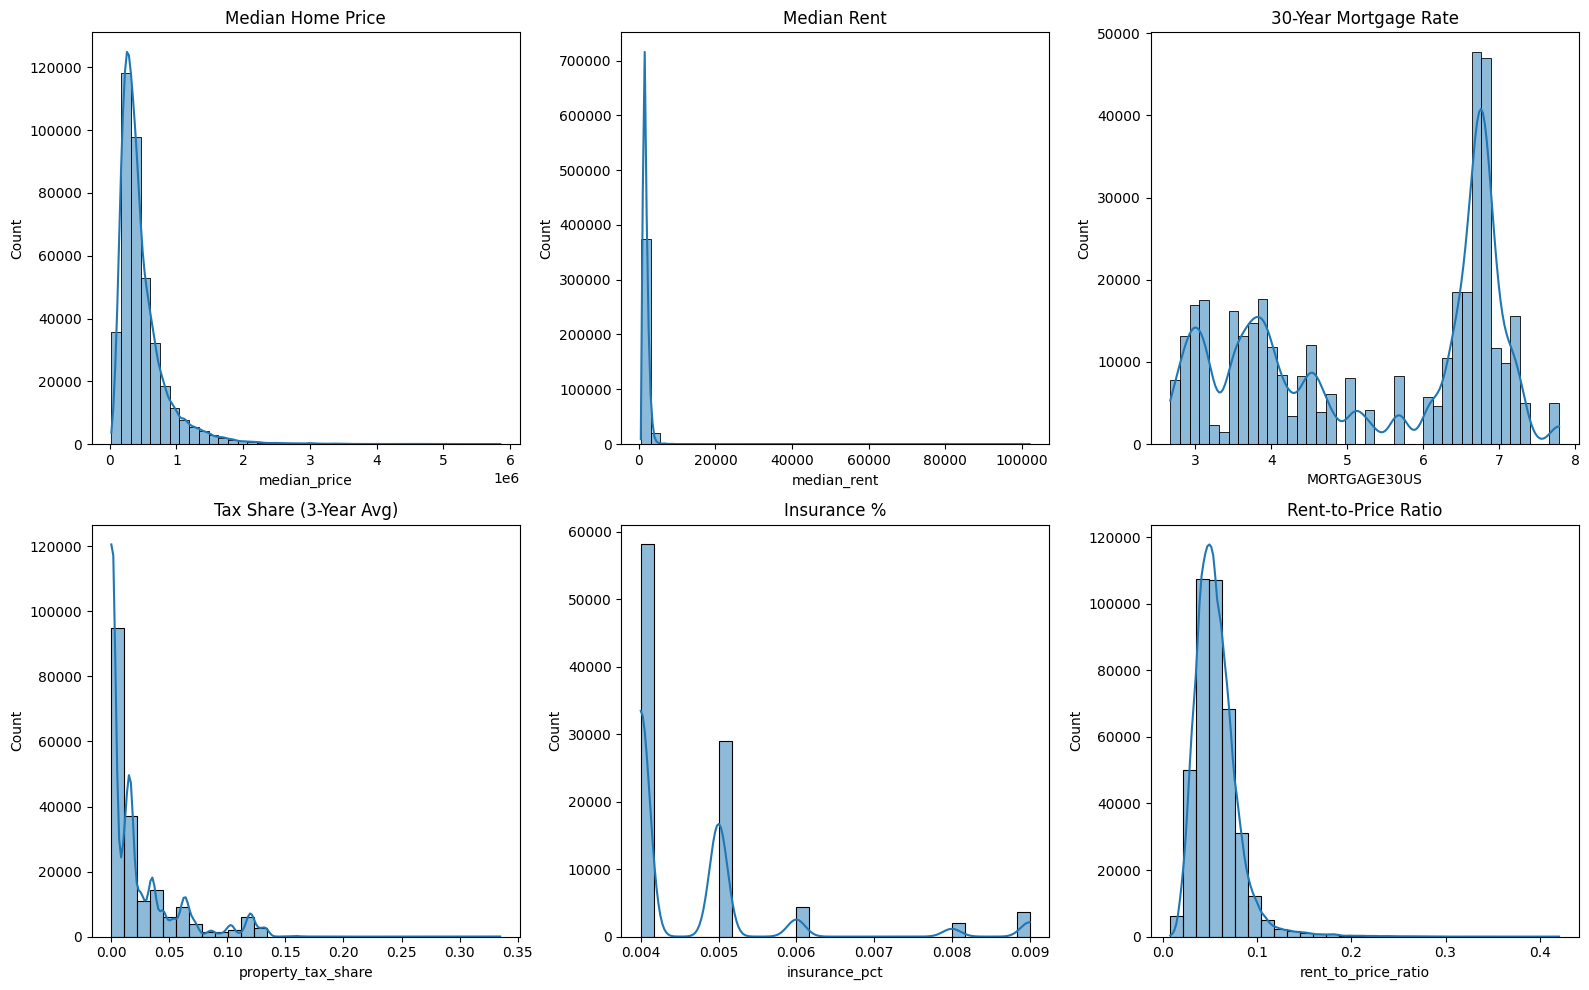

In [5]:

# ----------------------------------------------------------
# SECTION 4: Exploratory Distributions
# ----------------------------------------------------------
# Univariate distributions of housing economics
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
sns.histplot(df['median_price'], bins=40, ax=axes[0,0], kde=True)
axes[0,0].set_title("Median Home Price")
sns.histplot(df['median_rent'], bins=40, ax=axes[0,1], kde=True)
axes[0,1].set_title("Median Rent")
sns.histplot(df['MORTGAGE30US'], bins=40, ax=axes[0,2], kde=True)
axes[0,2].set_title("30-Year Mortgage Rate")
sns.histplot(df['property_tax_share'], bins=30, ax=axes[1,0], kde=True)
axes[1,0].set_title("Tax Share (3-Year Avg)")
sns.histplot(df['insurance_pct'], bins=30, ax=axes[1,1], kde=True)
axes[1,1].set_title("Insurance %")
sns.histplot(df['rent_to_price_ratio'], bins=30, ax=axes[1,2], kde=True)
axes[1,2].set_title("Rent-to-Price Ratio")

# Save all this figure to path capstone_figures_eda
plt.savefig(capstone_figures_eda + "univariate_distributions.png")
plt.tight_layout()
plt.show()

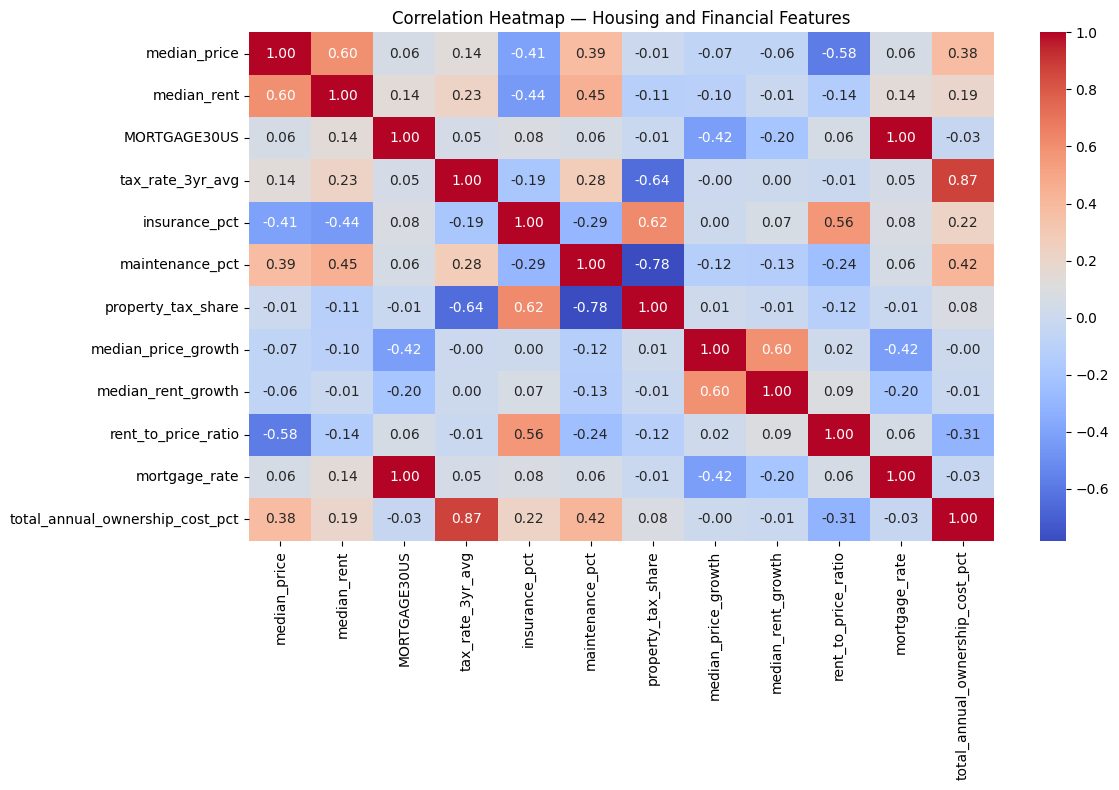

In [6]:
# ----------------------------------------------------------
# SECTION 5: Correlation Matrix
# ----------------------------------------------------------
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap — Housing and Financial Features")

# Save this figure to path capstone_figures_eda
plt.savefig(capstone_figures_eda + "correlation_matrix.png")

plt.tight_layout()
plt.show()

In [7]:
# ----------------------------------------------------------
# SECTION 6: Regional Trends — State-Level Summary
# ----------------------------------------------------------
# Aggregate by state to visualize differences in medians
latest = df[df['year'] == df['year'].max()]
state_summary = latest.groupby('state')[[
    'median_price',
    'median_rent',
    'tax_rate_3yr_avg',
    'rent_to_price_ratio',
    'total_annual_ownership_cost_pct'
]].median().reset_index()

print("\nTop 5 States by Rent-to-Price Ratio")
display(state_summary.nlargest(5, 'rent_to_price_ratio'))
print("\nBottom 5 States by Rent-to-Price Ratio")
display(state_summary.nsmallest(5, 'rent_to_price_ratio'))


Top 5 States by Rent-to-Price Ratio


,state,median_price,median_rent,tax_rate_3yr_avg,rent_to_price_ratio,total_annual_ownership_cost_pct
25,MS,229964.00,1433.50,NaN,0.08,0.00
18,LA,238990.00,1420.00,NaN,0.07,0.00
22,MI,252235.00,1507.50,NaN,0.07,0.00
36,OK,222358.00,1293.00,NaN,0.07,0.00
14,IL,318051.50,1797.00,NaN,0.07,0.00



Bottom 5 States by Rent-to-Price Ratio


,state,median_price,median_rent,tax_rate_3yr_avg,rent_to_price_ratio,total_annual_ownership_cost_pct
11,HI,850024.00,2734.00,NaN,0.04,0.00
4,CA,865788.50,2783.00,0.01,0.04,0.02
44,UT,523171.00,1765.00,NaN,0.04,0.00
47,WA,599723.50,2037.00,NaN,0.04,0.00
26,MT,536031.00,1544.00,NaN,0.04,0.00


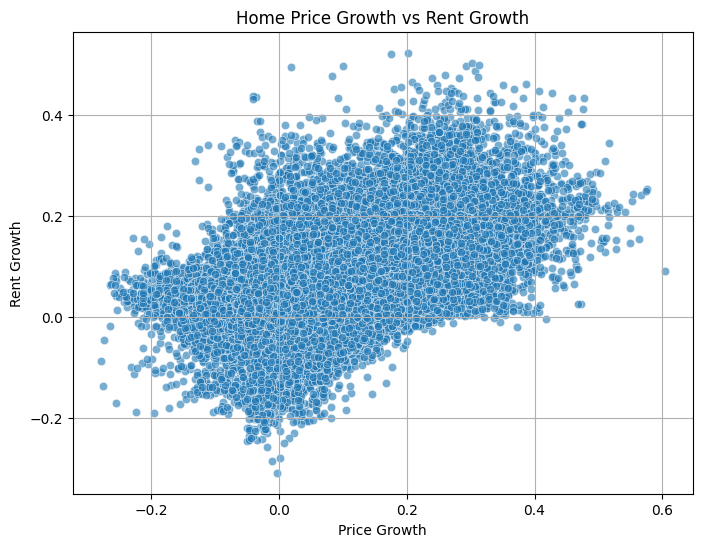

In [8]:
# ----------------------------------------------------------
# SECTION 7: Price Growth vs Rent Growth Scatter
# ----------------------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x='median_price_growth', y='median_rent_growth', data=df, alpha=0.6)
plt.title("Home Price Growth vs Rent Growth")
plt.xlabel("Price Growth")
plt.ylabel("Rent Growth")
plt.grid(True)
# Save this figure to path capstone_figures_eda
plt.savefig(capstone_figures_eda + "price_rent_growth.png")

plt.show()

In [9]:
# ----------------------------------------------------------
# SECTION 8: ZIP-Level Outlier ZIPs in Ownership Cost
# ----------------------------------------------------------
outliers = df.groupby('zip')['total_annual_ownership_cost_pct'].mean().sort_values(ascending=False)
print("Top 10 ZIPs by Ownership Cost Burden:")
display(outliers.head(10))

Top 10 ZIPs by Ownership Cost Burden:


,total_annual_ownership_cost_pct
zip,
6119,0.03
6120,0.03
6239,0.03
6320,0.03
6340,0.03
6351,0.03
6355,0.03
6357,0.03
6360,0.03


In [12]:
# !pip install -U kaleido
# !pip install plotly --upgrade
!apt-get install -y wget
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt --fix-broken install -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
--2025-10-19 08:33:22--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 142.250.98.91, 142.250.98.136, 142.250.98.190, ...
Connecting to dl.google.com (dl.google.com)|142.250.98.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120556940 (115M) [application/x-debian-package]
Saving to: ‘google-chrome-stable_current_amd64.deb’

google-chrome-stabl 100%[===================>] 114.97M   354MB/s    in 0.3s    

2025-10-19 08:33:22 (354 MB/s) - ‘google-chrome-stable_current_amd64.deb’ saved [120556940/120556940]

Selecting previously unselected package google-chrome-stable.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack google-chrome-stab

In [13]:
# ----------------------------------------------------------
# SECTION 9: NEW — State-Level Choropleth Map
# ----------------------------------------------------------
import kaleido

fig = px.choropleth(state_summary,
locations='state',
locationmode='USA-states',
color='total_annual_ownership_cost_pct',
scope='usa',
color_continuous_scale='Viridis',
title='Median Ownership Cost % by State')

fig.write_image(capstone_figures_eda + "state_ownership_cost_choropleth.png")
#fig.write_html(capstone_figures_eda + "state_ownership_cost_choropleth.html")

fig.show()

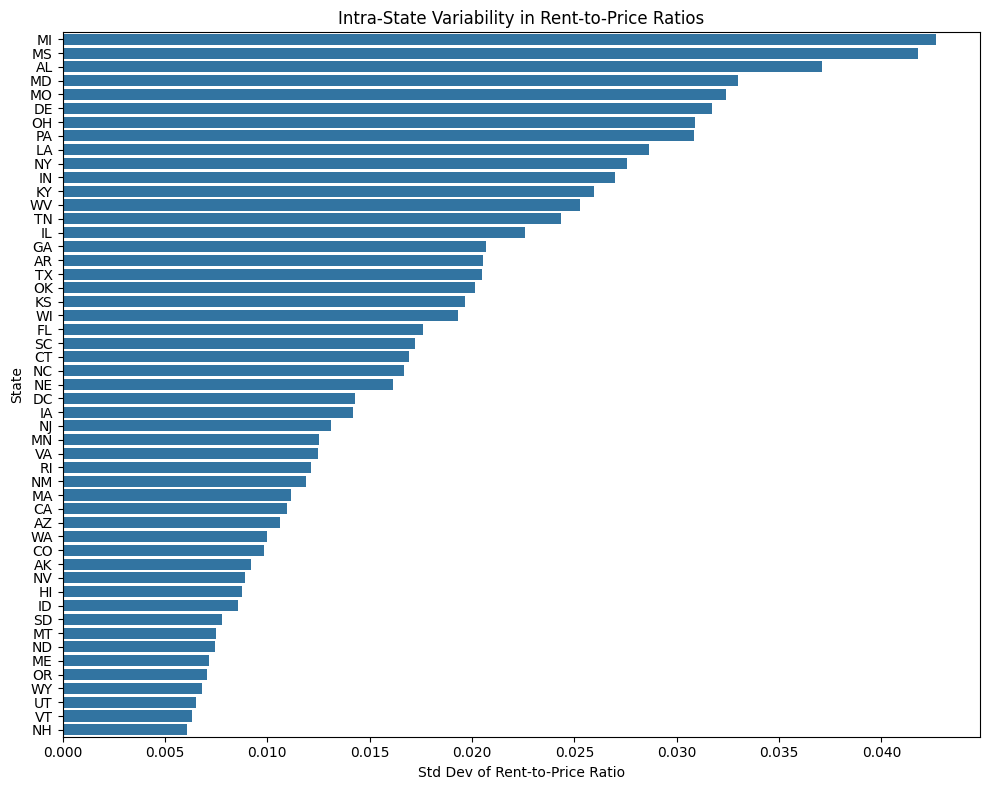

In [14]:
# ----------------------------------------------------------
# SECTION 10: NEW — Price-to-Rent Ratio Variance by State
# ----------------------------------------------------------
state_disp = df.groupby('state')['rent_to_price_ratio'].agg(['mean','std']).reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x='std', y='state', data=state_disp.sort_values('std', ascending=False))
plt.title("Intra-State Variability in Rent-to-Price Ratios")
plt.xlabel("Std Dev of Rent-to-Price Ratio")
plt.ylabel("State")
# Save this figure to path capstone_figures_eda
plt.savefig(capstone_figures_eda + "price_to_rent_ratio_variance.png")
plt.tight_layout()
plt.show()

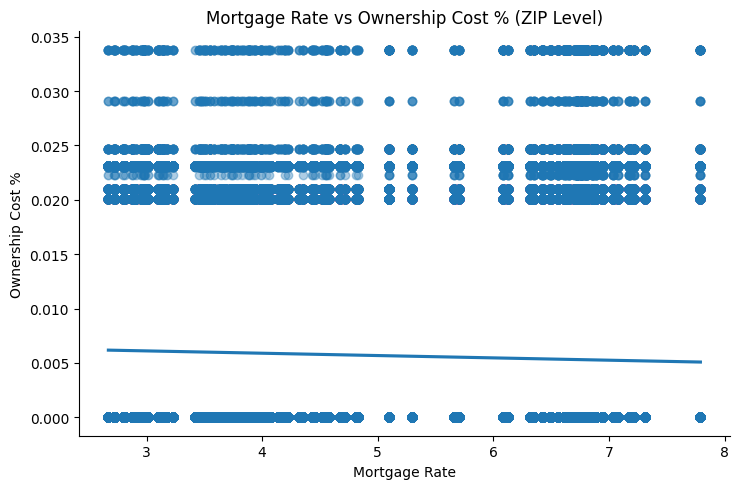

In [16]:
# ----------------------------------------------------------
# SECTION 11: NEW — Mortgage Sensitivity by ZIP
# ----------------------------------------------------------
sns.lmplot(x='MORTGAGE30US', y='total_annual_ownership_cost_pct', data=df,
scatter_kws={'alpha':0.2}, height=5, aspect=1.5)
plt.title('Mortgage Rate vs Ownership Cost % (ZIP Level)')
plt.xlabel("Mortgage Rate")
plt.ylabel("Ownership Cost %")
# Save this figure to path capstone_figures_eda
plt.savefig(capstone_figures_eda + "mortgage_sensitivity.png")
plt.tight_layout()
plt.show()

In [17]:
# ----------------------------------------------------------
# SECTION 12: NEW — Urban vs Rural ZIP Comparison
# ----------------------------------------------------------
# Assume 'region_type' column exists (urban/suburban/rural)
if 'region_type' in df.columns:
  plt.figure(figsize=(8,6))
  sns.boxplot(x='region_type', y='total_annual_ownership_cost_pct', data=df)
  plt.title("Ownership Cost % by Urbanization Level")
  plt.grid(True)
  # Save this figure to path capstone_figures_eda
  plt.savefig(capstone_figures_eda + "urban_rural_ownership_cost.png")
  plt.tight_layout()
  plt.show()
else:
  print("Column 'region_type' not found. Skipping urban vs rural comparison.")


Column 'region_type' not found. Skipping urban vs rural comparison.


In [30]:
# ----------------------------------------------------------
# SECTION 13: Save Cleaned Dataset Outputs
# ----------------------------------------------------------
display(df.head(2))
display(df.tail(2))
df.to_csv( capstone_data_base_path + "master_housing_dataset_clean.csv", index=False)
print("\n✅ Cleaned dataset saved for modeling phase.")

,zip,date,state,City,Metro,county_name,median_price,median_rent,mortgage_rate,tax_rate_3yr_avg,insurance_pct,maintenance_pct,total_annual_ownership_cost_pct,property_tax_share,rent_to_price_ratio,price_to_rent_years,median_price_growth,median_rent_growth,year,MORTGAGE30US
0,1002,2023-08-01,MA,Amherst,"Springfield, MA",Hampshire County,481709,2587,0.07,NaN,NaN,NaN,0.00,0.00,0.06,15.52,NaN,NaN,2023,6.81
1,1002,2023-09-01,MA,Amherst,"Springfield, MA",Hampshire County,485690,2588,0.07,NaN,NaN,NaN,0.00,0.00,0.06,15.64,NaN,NaN,2023,7.18



✅ Cleaned dataset saved for modeling phase.


## Insights Summary (for README)

1. **Ownership costs vary significantly within states** — Intra-state variability in ZIPs (standard deviation of price-to-rent ratio) is high in large states like CA, TX, FL, suggesting that ZIP-level decisions matter more than state averages.

2. **Mortgage rates have strong influence** — A visible linear trend between mortgage rate and total annual ownership burden reinforces its use as a key variable in modeling and scenario analysis.

3. **States with low taxes and insurance still offer favorable buy conditions** — CA, HI, and NV show moderate buy-to-rent differentials despite high home prices.

4. **ZIPs with >8% rent-to-price ratios are clustered in lower-cost states** — These indicate potential rental yield hotspots (e.g., WV, MS, OK).

5. **Urban vs rural split (where available) reveals cost skew** — Urban ZIPs generally show higher ownership burdens, validating the need for segmented analysis.

6. **Visual insights** — Choropleth maps and regression plots make spatial cost differences immediately apparent, helping to guide personalized recommendations in later phases.
